In [1]:
## Add Library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
## Link with data
data = '/content/drive/MyDrive/train'

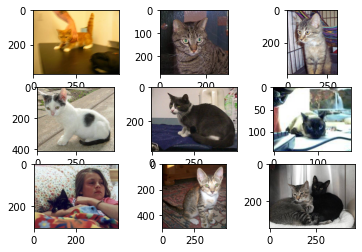

In [4]:
from matplotlib import image
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder ='/content/drive/MyDrive/train'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + '/cats'+'/cat.' + str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)

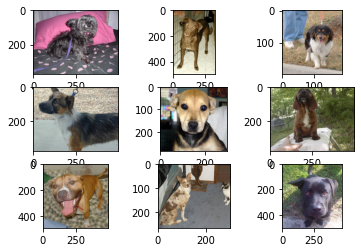

In [5]:
folder ='/content/drive/MyDrive/train'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + '/dogs'+'/dog.' + str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)

In [6]:
## Resize image
image_size = (150,150)
TRAINING_DATA_DIR = str(data)
print(TRAINING_DATA_DIR)

# modify data
kwargs_datagen = dict(rescale=1./255, validation_split=0.2) # 20 percent for validation

# validation data modify 
valid_datagen = ImageDataGenerator(**kwargs_datagen)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", shuffle=True, target_size=image_size)

## Train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=image_size)

/content/drive/MyDrive/train
Found 400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [7]:
## Labels and match class
image_batch_train, label_batch_train = next(iter(train_generator))
print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

image batch shape:  (32, 150, 150, 3)
label batch shape:  (32, 2)
labels:  ['Cats' 'Dogs']
match class:  {'cats': 0, 'dogs': 1}


In [10]:
## CNN for Train
model=Sequential()
# BLock 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history=model.fit(train_generator,epochs=10,batch_size=4,validation_data=valid_generator,steps_per_epoch=steps_per_epoch,verbose=1)

# Save model
model.save('cat_dog_detec.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

Sai so:  0.07916206121444702
Do chinh xac:  0.965624988079071


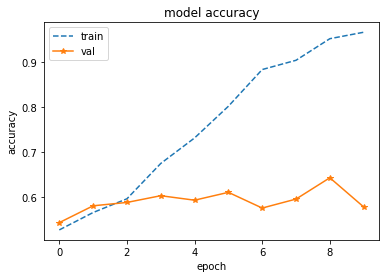

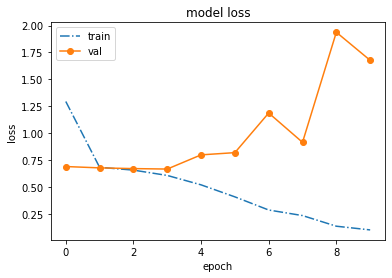

In [23]:
## Grap off val_accurary
score = model.evaluate(train_generator, verbose = 0)
print('Sai số là: ', score[0])
print('Độ chính xác là: ', score[1])

## Model accurary
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'],'-*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()
## Model loss
plt.plot(history.history['loss'],'-.')
plt.plot(history.history['val_loss'],'-o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [17]:
## Import image
from google.colab import files
TEST = files.upload()

Saving cat.1016.jpg to cat.1016.jpg


This is Cat


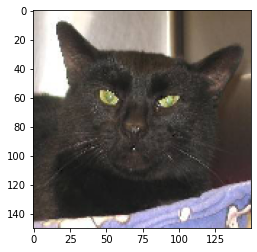

In [22]:
## Testing code with CNN model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np
## Load and define image - to test
img = load_img('cat.1016.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
## Result
guess=np.argmax(model.predict(img),axis=1)
if guess[0]==0:
  print("This is Cat")
if guess[0]==1:
  print("This is Dog")

This is Dog


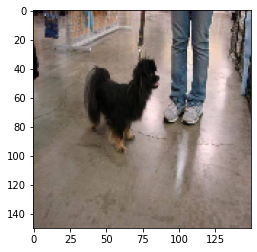

In [21]:
## Testing code with CNN model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np
## Load and define image - to test
img = load_img('dog.1000.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
## Result
guess=np.argmax(model.predict(img),axis=1)
if guess[0]==0:
  print("This is Cat")
if guess[0]==1:
  print("This is Dog")